# NETWORK ANALYSIS OF SHAKESPEARE'S MACBETH

## By Moses Boudourides & Sergios Lenis

### With contributions from the Group of participants of "Literature Networks"

# II. Interactive Network Computations on Shakespeare's Macbeth

In [43]:
%matplotlib inline 
%load_ext autoreload
from IPython.display import display
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pickle
from prettytable import PrettyTable #sudo pip install prettytable
from utils import *
def choid(x):
    return x

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
%autoreload 2
from testy2 import *
from syntheticThreeLayerGraph_time import synthetic_multi_level_dict,plot_graph_dict,plot_graph_k_n, plot_total_graph_with_weights

fileName = 'corpora/ShakespeareMacbethOrig_from_PG_mod.txt'
f=open(fileName,'r')
attributes_filename='corpora/Character Atrributes - Macbeth - 1.csv'

act_dict,u,pers_l,pers_dict,pact,lact,scen_dict,lscen,pscen=create_dict_of_acts(fileName)
fop=open('list_of_attributes_dic.dmpp')
list_of_attributes_dic=pickle.load(fop)
fop.close()
fop=open('attribute_dict.dmpp')
attribute_dict=pickle.load(fop)
fop.close()
fop=open('list_of_att.dmpp')
list_of_att=pickle.load(fop)
fop.close()
# attribute_dict={}
# af=open(attributes_filename,'r')

lis_pret=['Name','Gender','Social Status','Alliance','Drive','Count of speech characters']
# pret=PrettyTable(lis_pret)
# pret.padding_width=1

In [45]:
graph_dic,ract_dic,pernode_dict,nodper_dic,cnum,active_actors=create_graph_dict(act_dict,pers_l,pers_dict,u,attribute_dict)
G, list_of_Graphs_final, Gagr, edgeList ,nmap ,mapping,k,n=synthetic_multi_level_dict(graph_dic,pernode_dict,nodper_dic,ract_dic,No_isolates=True)
conver_rel = 0

pos_dict={}

for k,v in graph_dic.items():
    v.remove_nodes_from(nx.isolates(v))
    conver_rel += len(v.edges())
# print cnum
graph_dic_scene,ract_dicS,pernode_dictS,nodper_dicS,cnumS,active_actors_sc=create_graph_dict(scen_dict,pers_l,pers_dict,u,attribute_dict)
G, list_of_Graphs_finalS, GagrS, edgeListS ,nmapS ,mappingS,k,n=synthetic_multi_level_dict(graph_dic_scene,pernode_dictS,nodper_dicS,ract_dicS,No_isolates=True)
for k,v in graph_dic_scene.items():
    v.remove_nodes_from(nx.isolates(v))
#     conver_rel += len(v.edges())
# print cnumS
ract_dic.update(ract_dicS)
for ll in cnumS:
    cnum.append(ll)
# cnum.update(cnumS)
uu=len(graph_dic.keys())
scene_acts={'Scene '+str(i):u+uu for u,i in enumerate(sorted(graph_dic_scene.keys()))}
met_acts={'Act '+str(i):u for u,i in enumerate(sorted(graph_dic.keys())) }
# uu=len()
met_acts['(all Acts)'] = 1000
met_acts.update(scene_acts)
graph_dic['(all Acts)']=plot_total_graph_with_weights(graph_dic,nodper_dic)
graph_dic.update(graph_dic_scene)
rmet_acts={k:v for v,k in met_acts.items()}

### Selection of an Act

In [46]:
ww=interactive(choid, x=(met_acts))
display(ww)
# index_graph=ww.result


19

## Macbeth Network Visualizations

The number of actors in Macbeth's Act Scene III.VI is 10
The number of conversational relationships in Macbeth's Act Scene III.VI is 10

WEIGHTED CONVERSATIONAL RELATIONSHIPS:

(DONALBAIN, LENNOX) 1
(LENNOX, MACBETH) 2
(LENNOX, MACDUFF) 2
(LENNOX, MALCOLM) 1
(LENNOX, BANQUO) 1
(LENNOX, FLEANCE) 3
(LENNOX, DUNCAN) 2
(MACDUFF, LORD) 1
(LORD, SEYWARD) 1
(LORD, DUNCAN) 1



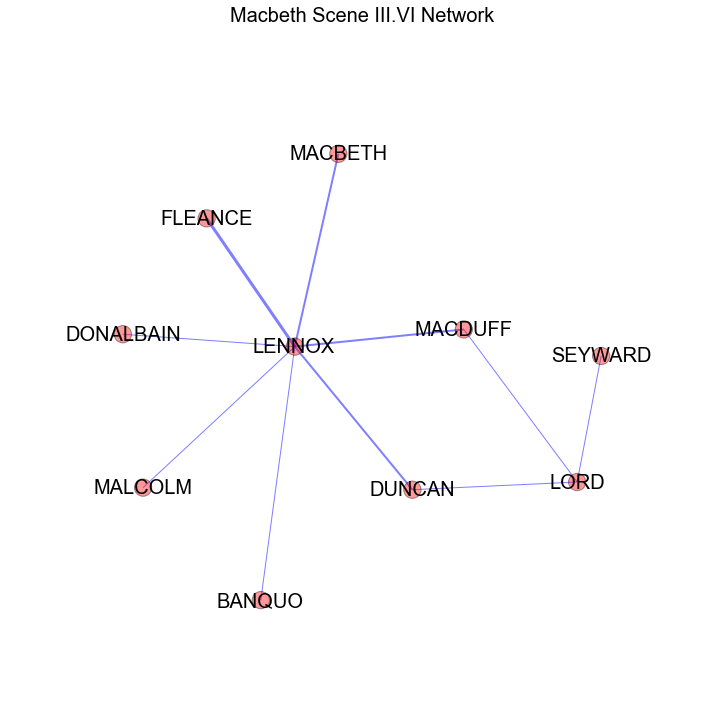

In [47]:
import pandas as pd
attr_dict_graph={5:'count_of_speech_characters',1:'gender',2:'social_status',3:'alliance',4:'drive'}
# print ww.result
index_graph=ww.result
if index_graph !=1000:
    play_st="Macbeth's Act"
   
    
    H = graph_dic[ract_dic[cnum[index_graph]]]
else:
#     print 'a'
    play_st="Macbeth Network"
    H=graph_dic['(all Acts)']
act_st=rmet_acts[index_graph]
select_attribute=select_attributes.result
# print select_attribute
# print play_st,act_st
try:
    f=open('positions_of_Mc_Shake.dmp')
    pos_dict=pickle.load(f)
    pos =pos_dict[index_graph]
except:
    pos=nx.spring_layout(H,scale=50)
    pos_dict[index_graph]=pos
print "The number of actors in %s %s is %i" %(play_st,act_st, len(H.nodes()))
print "The number of conversational relationships in %s %s is %i" %(play_st,act_st, len(H.edges()))
print
print 'WEIGHTED CONVERSATIONAL RELATIONSHIPS:'
print
for edge in H.edges(data=True):
    print '(%s, %s)' %(nodper_dic[edge[0]],nodper_dic[edge[1]]),edge[2]['weight']
print 
sstt=play_st[:7]+' '+act_st+ ' '+'Network'
H.remove_nodes_from(nx.isolates(H))
posit=draw_network(H,sstt,pos=pos,with_edgewidth=True,withLabels=True,pernode_dict=pernode_dict,labfs=10,valpha=0.4,ealpha=0.4)

## Selection of an Attribute

In [48]:
select_attributes=interactive(choid,x={v:i for i,v in enumerate(lis_pret) if i!=0})
display(select_attributes)

2

## Macbeth Network Attribute Assortativities

Macbeth Scene III.VI Network
ASSORTATIVITY COEFFICIENT (HOMOPHILY)
Social Status =  nan

Mixing Matrix (unnormalized)
Noble
       Noble
Noble     20


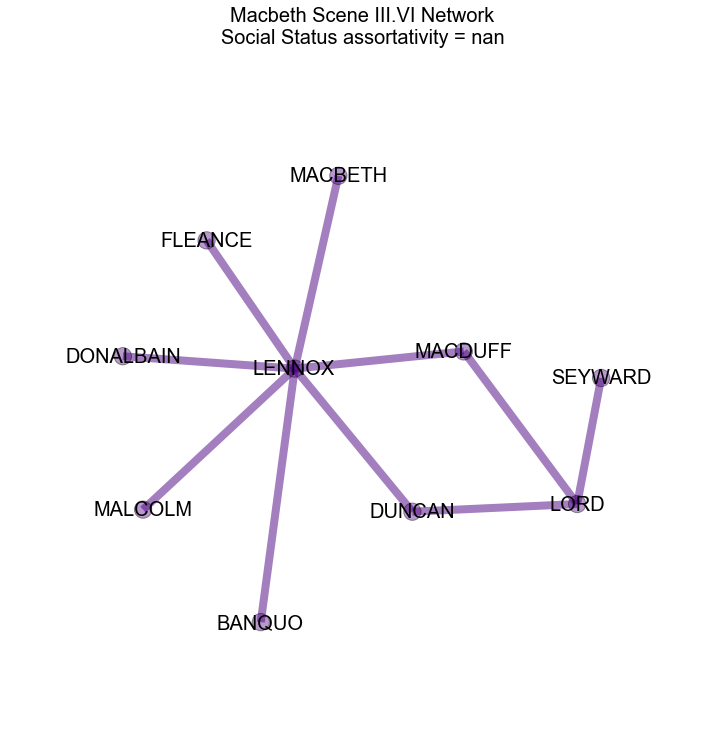

In [54]:
import matplotlib
select_attribute=select_attributes.result
print sstt
print 'ASSORTATIVITY COEFFICIENT (HOMOPHILY)'

att_asso_coef=nx.attribute_assortativity_coefficient(H,attr_dict_graph[select_attribute])
print lis_pret[select_attribute]+' = ', '%.4f' %att_asso_coef
print
print 'Mixing Matrix (unnormalized)'

list_of_attributes_dc=[]
for ndk in H.nodes(data=True):
    attr_ni=ndk[1][attr_dict_graph[select_attribute]]
    if attr_ni not in list_of_attributes_dc:
        print attr_ni
        list_of_attributes_dc.append(attr_ni)

print pd.DataFrame(nx.attribute_mixing_matrix(H,attr_dict_graph[select_attribute],normalized=False),
                   index=list_of_attributes_dc,
                  columns=list_of_attributes_dc)
color_parti={}
labels_n={}
for nd in H.nodes(data=True):
    labels_n[nd[0]]=nd[1]['label']
#     print nd
    if nd[1][attr_dict_graph[select_attribute]] not in color_parti:
        color_parti[nd[1][attr_dict_graph[select_attribute]]]=[nd[0]]
    else:
        color_parti[nd[1][attr_dict_graph[select_attribute]]].append(nd[0])
color=color_parti.values()#[[0, 7, 12, 15, 17, 19], [1, 9, 14], [2, 6, 13], [8, 11, 18], [5, 10, 16],[4,3]]
color_part={v:i for i,k in enumerate(color) for v in k}
colorsl=[name for name,hex in matplotlib.colors.cnames.iteritems()]
rcolo_part={}
for i,k in color_part.items():
    if k not in rcolo_part:
        rcolo_part[k]=[i]
    else:
        rcolo_part[k].append(i)
for nd in H.nodes():
    H.add_node(nd,attr_dict=H.node[nd],color=color_part[nd])
col ={j:colorsl[i] for i,v in enumerate(color) for j in v}
colors = [col[j] for j in H.nodes()]
ed_col={i:[] for i in color_part.values()}
ned_col=[]
for edg in H.edges():
    ed=edg[0]
    de=edg[1]
    
    if color_part[ed]==color_part[de]:
        ed_col[color_part[ed]].append(edg)
    else:
        ned_col.append(edg)

atas=nx.attribute_assortativity_coefficient(H,attr_dict_graph[select_attribute])

sstta=sstt+"\n%s assortativity = %.04f" %(lis_pret[select_attribute],atas)
pospos=plt.figure(figsize=(12,12))
nx.draw_networkx_nodes(H,pos=pos,with_labels=False,node_color=colors, alpha=0.4)#node_color=colors
labe=nx.draw_networkx_labels(H,pos=pos,labels=labels_n,font_size=20)
nx.draw_networkx_edges(H,pos=pos,edgelist=ned_col, edge_color='b', alpha=0.5)
for ke,va in ed_col.items():
    ed_colors=[colorsl[ke] for i in va]
    nx.draw_networkx_edges(H,pos,edgelist=va,width=8,alpha=0.5,edge_color=ed_colors)
pospos=plt.title(sstta,fontsize=20)
pospos=plt.axis('off')

## Macbeth Network Centralities

In [50]:
centr_dict={'degree_centrality':1,'closeness_centrality':2,'betweenness_centrality':3,'eigenvector_centrality':4,'katz_centrality':5,'page_rank':6}
centrs=interactive(choid, x=(centr_dict))
display(centrs)

2

Node LENNOX has closeness centrality = 0.7500
Node MACDUFF has closeness centrality = 0.5625
Node DUNCAN has closeness centrality = 0.5625
Node DONALBAIN has closeness centrality = 0.4500
Node MACBETH has closeness centrality = 0.4500
Node MALCOLM has closeness centrality = 0.4500
Node BANQUO has closeness centrality = 0.4500
Node LORD has closeness centrality = 0.4500
Node FLEANCE has closeness centrality = 0.4500
Node SEYWARD has closeness centrality = 0.3214


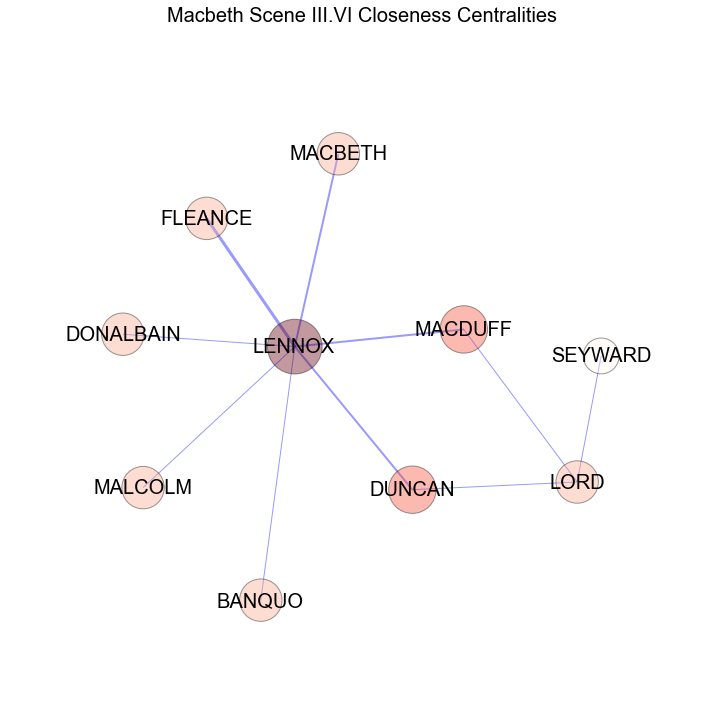

In [51]:
# play_st="Macbeth Act"
# index_graph=0
# act_st='I'
centr_dicts={v:k for k,v in centr_dict.items()}
centr=centr_dicts[centrs.result]
H = graph_dic[ract_dic[cnum[index_graph]]]
H.remove_nodes_from(nx.isolates(H))
draw_centralities(H,centr,pos_dict[index_graph],with_edgewidth=True,withLabels=True,pernode_dict=pernode_dict,title_st=play_st[:7]+' '+act_st)


## Macbeth Network Communities

Number of communities of Macbeth Scene III.VI Network = 2
Community partition of Macbeth Scene III.VI Network:
[['DONALBAIN', 'MACBETH', 'LENNOX', 'MALCOLM', 'BANQUO', 'FLEANCE'], ['MACDUFF', 'LORD', 'SEYWARD', 'DUNCAN']]
Community modularity of Macbeth Scene III.VI Network = 0.1778


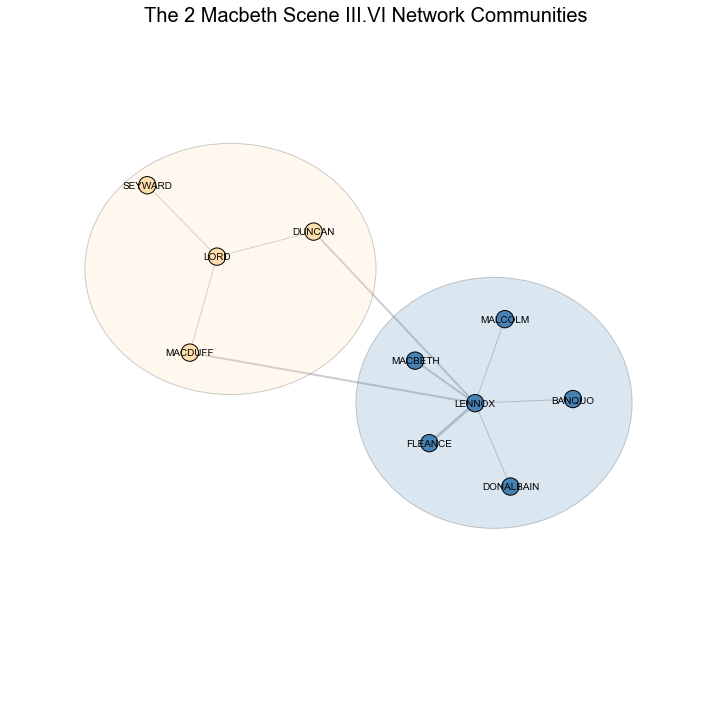

In [52]:
from chAs import draw_comms,modul_arity
import community as comm

# G = graph_dic[ract_dic[cnum[0]]]
H.remove_nodes_from(nx.isolates(H))
labels={i:v for v,i in pernode_dict.items() if i in H.nodes()}

part=comm.best_partition(H) 
print 'Number of communities of %s = %i' %(sstt, max(part.values())+1)
print 'Community partition of %s:' %(sstt)
parLis=[]
partdi={}
for i,k in part.items():
    if k not in partdi:
        partdi[k]=[nodper_dic[i]]
    else:
        partdi[k].append(nodper_dic[i])
for i,k in partdi.items():
    parLis.append(k)
print parLis
print 'Community modularity of %s = %.4f' %(sstt, comm.modularity(part,H))

d=0.8 
dd=0.8
c=1.2
cc=1.4
alpha=0.2
ealpha=.2
vcc={}
sstta="The %s %s Communities" %(max(part.values())+1,sstt)

draw_comms(H,H.nodes(),[],[],[] ,part,part,d,dd,c,cc,alpha,ealpha,nodper_dic,sstta,titlefont=20,labelfont=10)